# **Setting Up Project: Installing and Importing Essential Libraries**

In this guide, we will walk you through the critical steps to properly set up your Google Colab environment by installing and importing the necessary libraries for your project. A robust foundation with the right libraries is essential to ensure the seamless execution of your data analysis, machine learning, or deep learning endeavors.


In [9]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install accelerate
!pip install bitsandbytes
!pip uninstall umap -y
!pip uninstall umap-learn -y
!pip install umap-learn
!pip install replicate
from google.colab import drive
import pandas as pd
import numpy as np
import pickle
import umap as umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import locale
from transformers import AutoTokenizer, pipeline
import torch
import os
import re
import replicate
from IPython.display import clear_output
import time
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
locale.getpreferredencoding = lambda: "UTF-8"


  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-uko4w8xs
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-uko4w8xs
  Resolved https://github.com/huggingface/transformers.git to commit 0b192de1f353b0e04dad4813e02e2c672de077be
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Found existing installation: umap-learn 0.5.4
Uninstalling umap-learn-0.5.4:
  Successfully uninstalled umap-learn-0.5.4
  Using cached umap_learn-0.5.4-py3-none-any.whl


# **Setting the Root Directory and Importing Essential Files from Google Drive**

In this section, we will establish the foundation for your project by defining the root directory and importing the essential files from your Google Drive. These files encompass the embedding data, reduced embedding, and the core data file, which are crucial components for your analysis or project.

## **Defining the Root Directory**

Before importing any files, let's define a root directory where we can organize and access our project's files efficiently. A well-structured directory makes it easier to manage and work with your data and resources. You can set the root directory using the following code.

In [2]:
root = "/content/drive"
drive.mount(root,  force_remount=False)
url_dict = {
            'RoBERTa-DE-EN' : 'T-Systems-onsite/cross-en-de-roberta-sentence-transformer',
            'USE_Multilingual':'distiluse-base-multilingual-cased-v1'
}

#@markdown  #Global Parameters

model_type = 'RoBERTa-DE-EN' #@param ['RoBERTa-DE-EN', 'USE_Multilingual']

model_name = url_dict[model_type]
data_name = 'data_'+model_type+'.pkl'
embeddings_name = 'embeddings50_'+model_type
name = "LUSIR_Data_Exploration_7-5-21" #@param {type:'string'}
labeled_data_name = name+'_data_'+model_type
labeled_data_name_processed ='data_'+model_type

#@markdown path_name specifies the folder where everything is saved.
path_name = "Output LUSIR/" #@param {type:'string'}
path = root+"/My Drive/"+path_name

name_path = path+name+"/"
output_path = name_path+"out/"
model_path = name_path+"model/"
data_path = path+"preprocessed/"
data = pd.read_pickle(output_path+labeled_data_name_processed+'.pkl')
embeddings = np.load(data_path+embeddings_name+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

reducer = pickle.load(open(model_path+name+"reducer.pkl", "rb"))
embeddings_umap = reducer.embedding_

Mounted at /content/drive
Sat Sep 30 18:21:40 2023 Building and compiling search function


In [ ]:
print(data.head())

In [ ]:
embeddings_reduced = embeddings_umap
#embeddings_reduced = embeddings
print(len(embeddings_reduced))

7205


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(embeddings_reduced)
embeddings_reduced = scaler.transform(embeddings_reduced)

# **Optimizing Threshold Value for UMAP Dimensionality Reduction**

In this section, we embark on the task of identifying the optimal threshold value for UMAP (Uniform Manifold Approximation and Projection) dimensional reduction. This process is instrumental in maximizing the effectiveness of UMAP by fine-tuning the parameters to achieve the best results.

## **Searching for the Ideal Threshold Value**

The selection of an appropriate threshold value plays a pivotal role in UMAP dimensional reduction. It allows us to control the level of granularity in the reduced representation of data. To find the best threshold value, we will follow a systematic approach:

1. **Parameter Tuning**: Begin by fine-tuning the parameters of the UMAP algorithm, such as `n_neighbors` and `min_dist`, to achieve the optimal embedding of your data. This step involves experimenting with different parameter combinations and assessing their impact on the quality of the reduced data.

2. **Threshold Variation**: With the optimized parameters in place, systematically vary the threshold value over a suitable range. This may involve values from very small to large thresholds, depending on your specific dataset and objectives.

3. **Evaluation Metrics**: Utilize appropriate evaluation metrics, such as silhouette score, Davies-Bouldin index, or domain-specific criteria, to assess the quality of the reduced data for each threshold value.

4. **Selecting the Best Threshold**: Identify the threshold value that yields the highest performance according to your chosen evaluation metric(s). This value will be considered the best threshold for your UMAP dimensional reduction.

## **Iterative Experimentation**

Remember that fine-tuning UMAP parameters and selecting the optimal threshold may require iterative experimentation. It's often necessary to strike a balance between preserving essential features and reducing dimensionality effectively.

By systematically exploring the parameter space and assessing the impact of threshold variations, you will be equipped to make informed decisions and achieve the best possible results for your UMAP dimensional reduction.

This approach ensures a professional and data-driven methodology for optimizing the threshold value, enhancing the utility of UMAP in your data analysis or machine learning projects.


In [3]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def dimentional_reduction(num_dimensions):
  reducer = umap.UMAP(n_neighbors=150,
                     min_dist=0,
                     n_components=num_dimensions,
                     metric='jaccard',
                     verbose = True
                      )
  return reducer
try:
  embeddings_reduced = pickle.load(open(model_path+name+"finale_reducer.pkl", "rb"))
except:
  reducer=dimentional_reduction(90)
  embeddings_reduced = reducer.fit_transform(embeddings)
scaler = StandardScaler()
scaler.fit(embeddings_reduced)
embeddings_reduced = scaler.transform(embeddings_reduced)
silhouette_scores = []
davies_scores = []
calinski_scores = []
cluster_numbers=[]
threshold_value=[]
generate_thresholds = lambda start, end, step: [start + i * step for i in range(int((end - start) / step) + 1)]
threshold_start = 0.1 #@param {type:"number"}
threshold_end = 1.3#@param {type:"number"}
threshold_step = 0.02#@param {type:"number"}
threshold_values = generate_thresholds(threshold_start, threshold_end, threshold_step)

metric_param = "cosine"


for threshold in threshold_values:
  try:
    clustering = AgglomerativeClustering(n_clusters=None,
                                        metric=metric_param,
                                        linkage='average',
                                        distance_threshold=threshold)
    labels = clustering.fit_predict(embeddings_reduced)
    cluster_numbers.append(len(np.unique(labels)))
    silhouette_scores.append(round(silhouette_score(embeddings_reduced, labels),2))
    davies_scores.append(round(davies_bouldin_score(embeddings_reduced, labels),2))
    calinski_scores.append(round(calinski_harabasz_score(embeddings_reduced, labels),2))
    threshold_value.append(round(threshold,2))
  except:
    threshold_values.remove(threshold)
    continue
best_threshold = threshold_values[np.argmax(silhouette_scores)]
print(8*"****")
print("best_threshold: silhouette_score \n",best_threshold)
print("threshold values:\n",threshold_value)
print("silhouette_scores values:\n",silhouette_scores)
print("davies_scores values:\n",davies_scores)
print("calinski_scores values:\n",calinski_scores)
print("Number of clusters in each iteration:\n", cluster_numbers)



********************************
best_threshold: silhouette_score 
 0.1
threshold values:
 [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3]
silhouette_scores values:
 [0.65, 0.62, 0.57, 0.55, 0.52, 0.48, 0.46, 0.44, 0.4, 0.37, 0.37, 0.33, 0.32, 0.31, 0.29, 0.29, 0.27, 0.26, 0.24, 0.24, 0.22, 0.2, 0.18, 0.18, 0.18, 0.18, 0.18, 0.13, 0.07, 0.07, 0.07, 0.1, 0.1, 0.1, 0.25, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29]
davies_scores values:
 [0.66, 0.67, 0.71, 0.72, 0.73, 0.74, 0.73, 0.76, 0.79, 0.83, 0.84, 0.89, 0.88, 0.97, 0.96, 0.95, 0.94, 1.05, 1.05, 1.04, 1.04, 1.07, 1.09, 1.09

In [ ]:
print(len(silhouette_scores))
print(len(threshold_value))

61
61


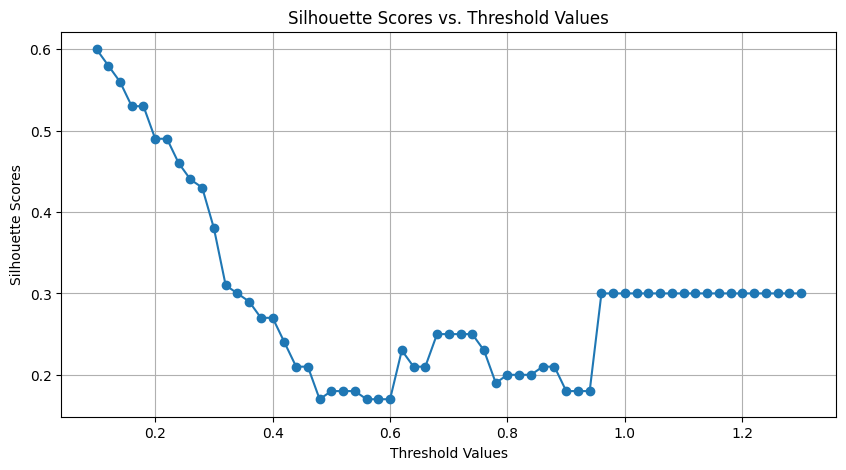

In [ ]:
# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(threshold_value, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Scores vs. Threshold Values")
plt.xlabel("Threshold Values")
plt.ylabel("Silhouette Scores")
plt.grid(True)
plt.show()

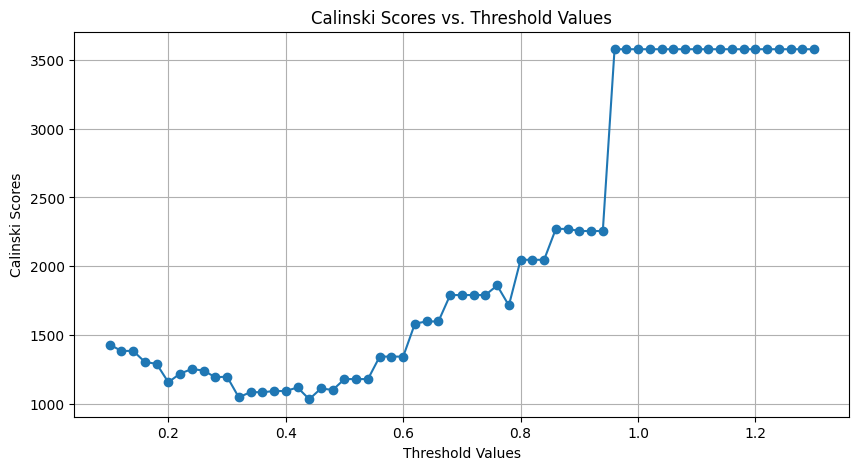

In [ ]:
# Plot Calinski scores

plt.figure(figsize=(10, 5))
plt.plot(threshold_value, calinski_scores, marker='o', linestyle='-')
plt.title("Calinski Scores vs. Threshold Values")
plt.xlabel("Threshold Values")
plt.ylabel("Calinski Scores")
plt.grid(True)
plt.show()


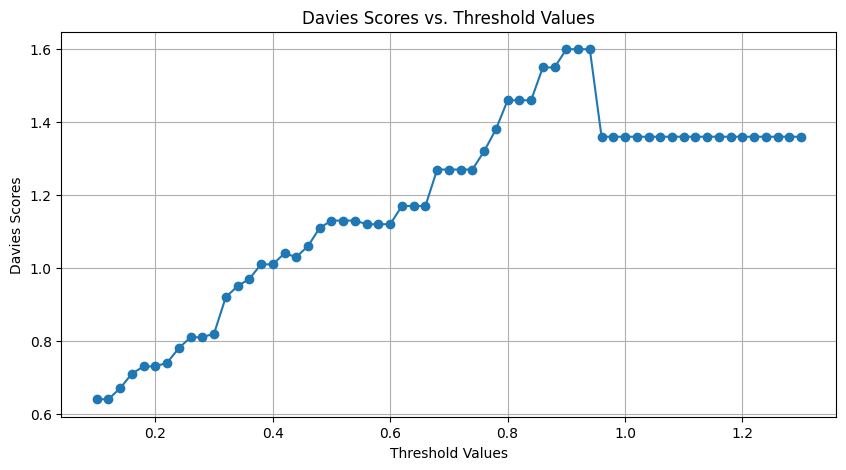

In [ ]:
# Plot Calinski scores

plt.figure(figsize=(10, 5))
plt.plot(threshold_value, davies_scores, marker='o', linestyle='-')
plt.title("Davies Scores vs. Threshold Values")
plt.xlabel("Threshold Values")
plt.ylabel("Davies Scores")
plt.grid(True)
plt.show()


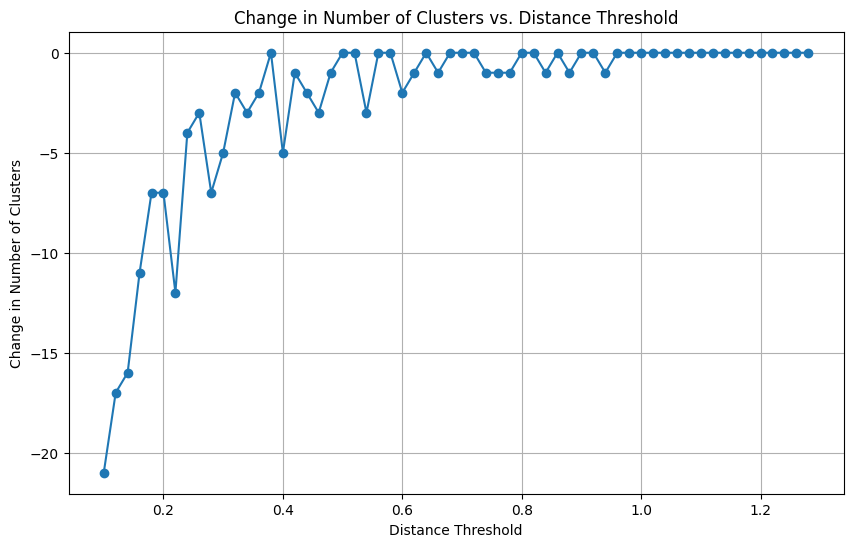

In [ ]:

# Calculate the difference in the number of clusters between each step
cluster_diff = [cluster_numbers[i] - cluster_numbers[i - 1] for i in range(1, len(cluster_numbers))]

# Plotting the difference in the number of clusters between each step
plt.figure(figsize=(10, 6))
plt.plot(threshold_value[0:len(threshold_value)-1], cluster_diff, marker='o', linestyle='-')
plt.xlabel('Distance Threshold')
plt.ylabel('Change in Number of Clusters')
plt.title('Change in Number of Clusters vs. Distance Threshold')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def dimentional_reduction(num_dimensions):
  reducer = umap.UMAP(n_neighbors=150,
                     min_dist=0,
                     n_components=num_dimensions,
                     metric='jaccard',
                     verbose = True
                      )
  return reducer
try:
  embeddings_reduced = pickle.load(open(model_path+name+"finale_reducer.pkl", "rb"))

except:
  reducer=dimentional_reduction(90)
  embeddings_reduced = reducer.fit_transform(embeddings)
  pickle.dump(embeddings_reduced, open(model_path+name+"finale_reducer.pkl", "wb"))

In [7]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None,
                                        metric=metric_param,
                                        linkage='average',
                                        distance_threshold=best_threshold)
scaler = StandardScaler()
scaler.fit(embeddings_reduced)
embeddings_reduced = scaler.transform(embeddings_reduced)
labels = clustering.fit_predict(embeddings_reduced)


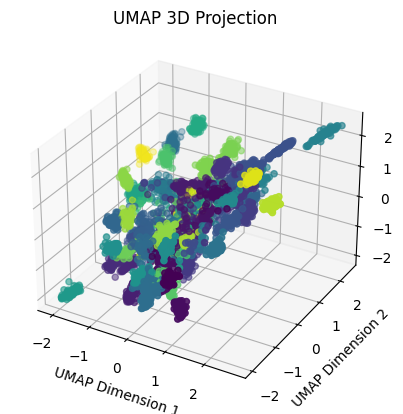

In [ ]:
#!pip install umap-learn matplotlib
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], embeddings_reduced[:, 2], c=labels, cmap='viridis')  # Replace your_labels with actual labels if available
ax.set_title('UMAP 3D Projection')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
#ax.legend()
plt.show()


# **Determining the Optimal Number of Dimensions for UMAP**

In this section, our objective is to discover the most suitable number of dimensions for UMAP (Uniform Manifold Approximation and Projection). This critical step is essential for optimizing the performance of UMAP and ensuring that the dimensional reduction aligns with your specific project requirements.

## **Selecting the Ideal Number of Dimensions**

Choosing the right number of dimensions is a fundamental aspect of UMAP dimensionality reduction. It enables us to strike a balance between preserving valuable information and reducing the dimensionality of the data effectively. To identify the optimal number of dimensions, follow these systematic steps:

1. **Initial Exploration**: Begin with an initial exploration by projecting your data into a wide range of dimensions, encompassing both lower and higher values. This provides a broad perspective on how varying dimensions affect the data representation.

2. **Dimensional Analysis**: Analyze the results to determine the number of dimensions that strike the best balance between dimensionality reduction and data information retention. Consider factors like the project's objectives, computational constraints, and the trade-off between complexity and interpretability.

3. **Fine-Tuning**: If necessary, engage in further fine-tuning by conducting experiments with dimensions around the identified optimal range to achieve the most refined representation.

## **Iterative Experimentation**

It's essential to recognize that the process of finding the ideal number of dimensions may require iterative experimentation. UMAP offers flexibility in dimensionality reduction, and the optimal number of dimensions often depends on the specific nature of your data and analytical goals.

By systematically exploring the dimensional space, evaluating results, and considering project-specific factors, you will be well-equipped to determine the optimal number of dimensions for your UMAP dimensional reduction. This approach ensures a professional and data-driven methodology for optimizing the dimensionality of your data, enhancing the utility of UMAP in your data analysis or machine learning projects.


In [ ]:
def dimentional_reduction(num_dimensions):
  reducer = umap.UMAP(n_neighbors=14,
                     min_dist=.1,
                     n_components=num_dimensions,
                     metric='jaccard',
                     verbose = True
                      )
  return reducer
silhouette_scores = []
davies_scores = []
calinski_scores = []
cluster_numbers=[]
generate_dimentions = lambda start, end, step: [start + i * step for i in range(int((end - start) / step) + 1)]
dimension_start = 50 #@param {type:"number"}
dimension_end = 200#@param {type:"number"}
dimension_step = 10#@param {type:"number"}
dimensions_values = generate_thresholds(dimension_start, dimension_end, dimension_step)

for dimension in dimensions_values:
    print(dimension)
    reducer=dimentional_reduction(dimension)
    embeddings_reduced = reducer.fit_transform(embeddings)
    scaler = StandardScaler()
    scaler.fit(embeddings_reduced)
    embeddings_reduced = scaler.transform(embeddings_reduced)
    print(embeddings_reduced.shape)
    clustering = AgglomerativeClustering(n_clusters=None,
                                         metric=metric_param,
                                         linkage='average',
                                         distance_threshold=0.1)
    labels = clustering.fit_predict(embeddings_reduced)
    silhouette_scores.append(silhouette_score(embeddings_reduced, labels))
    davies_scores.append(davies_bouldin_score(embeddings_reduced, labels))
    calinski_scores.append(calinski_harabasz_score(embeddings_reduced, labels))
    cluster_numbers.append(len(np.unique(labels)))

best_threshold = dimensions_values[np.argmax(silhouette_scores)]
print(8*"****")
print("best dimension: silhouette_score \n",best_threshold)
print("dimensions values:\n",dimensions_values)
print("silhouette_scores values:\n",silhouette_scores)
print("Number of clusters in each iteration:\n", cluster_numbers)

50
UMAP(angular_rp_forest=True, metric='jaccard', n_components=50, n_neighbors=14, verbose=True)
Sat Sep 23 11:25:09 2023 Construct fuzzy simplicial set
Sat Sep 23 11:25:09 2023 Finding Nearest Neighbors
Sat Sep 23 11:25:09 2023 Building RP forest with 9 trees
Sat Sep 23 11:25:09 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:25:09 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:25:09 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:26:10 2023 Finished embedding
(7205, 50)
60
UMAP(angular_rp_forest=True, metric='jaccard', n_components=60, n_neighbors=14, verbose=True)
Sat Sep 23 11:26:15 2023 Construct fuzzy simplicial set
Sat Sep 23 11:26:15 2023 Finding Nearest Neighbors
Sat Sep 23 11:26:15 2023 Building RP forest with 9 trees


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


Sat Sep 23 11:26:15 2023 NN descent for 13 iterations
	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:26:15 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:26:16 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:27:30 2023 Finished embedding
(7205, 60)
70
UMAP(angular_rp_forest=True, metric='jaccard', n_components=70, n_neighbors=14, verbose=True)
Sat Sep 23 11:27:33 2023 Construct fuzzy simplicial set
Sat Sep 23 11:27:33 2023 Finding Nearest Neighbors
Sat Sep 23 11:27:33 2023 Building RP forest with 9 trees
Sat Sep 23 11:27:33 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:27:34 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:27:34 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:28:45 2023 Finished embedding
(7205, 70)
80
UMAP(angular_rp_forest=True, metric='jaccard', n_components=80, n_neighbors=14, verbose=True)
Sat Sep 23 11:28:48 2023 Construct fuzzy simplicial set
Sat Sep 23 11:28:48 2023 Finding Nearest Neighbors
Sat Sep 23 11:28:48 2023 Building RP forest with 9 trees
Sat Sep 23 11:28:48 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:28:48 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:28:48 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:30:10 2023 Finished embedding
(7205, 80)
90
UMAP(angular_rp_forest=True, metric='jaccard', n_components=90, n_neighbors=14, verbose=True)
Sat Sep 23 11:30:13 2023 Construct fuzzy simplicial set
Sat Sep 23 11:30:13 2023 Finding Nearest Neighbors
Sat Sep 23 11:30:13 2023 Building RP forest with 9 trees
Sat Sep 23 11:30:13 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:30:13 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:30:13 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:31:43 2023 Finished embedding
(7205, 90)
100
UMAP(angular_rp_forest=True, metric='jaccard', n_components=100, n_neighbors=14, verbose=True)
Sat Sep 23 11:31:47 2023 Construct fuzzy simplicial set
Sat Sep 23 11:31:47 2023 Finding Nearest Neighbors
Sat Sep 23 11:31:47 2023 Building RP forest with 9 trees
Sat Sep 23 11:31:47 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:31:47 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:31:47 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:33:17 2023 Finished embedding
(7205, 100)
110
UMAP(angular_rp_forest=True, metric='jaccard', n_components=110, n_neighbors=14, verbose=True)
Sat Sep 23 11:33:21 2023 Construct fuzzy simplicial set
Sat Sep 23 11:33:21 2023 Finding Nearest Neighbors
Sat Sep 23 11:33:21 2023 Building RP forest with 9 trees
Sat Sep 23 11:33:21 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:33:21 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:33:21 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:35:02 2023 Finished embedding
(7205, 110)
120
UMAP(angular_rp_forest=True, metric='jaccard', n_components=120, n_neighbors=14, verbose=True)
Sat Sep 23 11:35:05 2023 Construct fuzzy simplicial set
Sat Sep 23 11:35:05 2023 Finding Nearest Neighbors
Sat Sep 23 11:35:05 2023 Building RP forest with 9 trees
Sat Sep 23 11:35:05 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:35:06 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:35:06 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:36:58 2023 Finished embedding
(7205, 120)
130
UMAP(angular_rp_forest=True, metric='jaccard', n_components=130, n_neighbors=14, verbose=True)
Sat Sep 23 11:37:02 2023 Construct fuzzy simplicial set
Sat Sep 23 11:37:02 2023 Finding Nearest Neighbors
Sat Sep 23 11:37:02 2023 Building RP forest with 9 trees
Sat Sep 23 11:37:02 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:37:02 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:37:02 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:38:57 2023 Finished embedding
(7205, 130)
140
UMAP(angular_rp_forest=True, metric='jaccard', n_components=140, n_neighbors=14, verbose=True)
Sat Sep 23 11:39:01 2023 Construct fuzzy simplicial set
Sat Sep 23 11:39:01 2023 Finding Nearest Neighbors
Sat Sep 23 11:39:01 2023 Building RP forest with 9 trees
Sat Sep 23 11:39:01 2023 NN descent for 13 iterations
	 1  /  

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:39:01 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:39:01 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:41:02 2023 Finished embedding
(7205, 140)
150
UMAP(angular_rp_forest=True, metric='jaccard', n_components=150, n_neighbors=14, verbose=True)
Sat Sep 23 11:41:06 2023 Construct fuzzy simplicial set
Sat Sep 23 11:41:06 2023 Finding Nearest Neighbors
Sat Sep 23 11:41:06 2023 Building RP forest with 9 trees
Sat Sep 23 11:41:06 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:41:06 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:41:07 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:43:18 2023 Finished embedding
(7205, 150)
160
UMAP(angular_rp_forest=True, metric='jaccard', n_components=160, n_neighbors=14, verbose=True)
Sat Sep 23 11:43:23 2023 Construct fuzzy simplicial set
Sat Sep 23 11:43:23 2023 Finding Nearest Neighbors
Sat Sep 23 11:43:23 2023 Building RP forest with 9 trees


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


Sat Sep 23 11:43:23 2023 NN descent for 13 iterations
	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:43:24 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:43:24 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:45:35 2023 Finished embedding
(7205, 160)
170
UMAP(angular_rp_forest=True, metric='jaccard', n_components=170, n_neighbors=14, verbose=True)
Sat Sep 23 11:45:40 2023 Construct fuzzy simplicial set
Sat Sep 23 11:45:40 2023 Finding Nearest Neighbors
Sat Sep 23 11:45:40 2023 Building RP forest with 9 trees
Sat Sep 23 11:45:40 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:45:41 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:45:41 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:48:04 2023 Finished embedding
(7205, 170)
180
UMAP(angular_rp_forest=True, metric='jaccard', n_components=180, n_neighbors=14, verbose=True)
Sat Sep 23 11:48:09 2023 Construct fuzzy simplicial set
Sat Sep 23 11:48:09 2023 Finding Nearest Neighbors
Sat Sep 23 11:48:09 2023 Building RP forest with 9 trees
Sat Sep 23 11:48:09 2023 NN descent for 13 iterations


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	 1  /  13
	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:48:10 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:48:10 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:50:42 2023 Finished embedding
(7205, 180)
190
UMAP(angular_rp_forest=True, metric='jaccard', n_components=190, n_neighbors=14, verbose=True)
Sat Sep 23 11:50:47 2023 Construct fuzzy simplicial set
Sat Sep 23 11:50:47 2023 Finding Nearest Neighbors
Sat Sep 23 11:50:47 2023 Building RP forest with 9 trees
Sat Sep 23 11:50:47 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:50:47 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:50:47 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:53:31 2023 Finished embedding
(7205, 190)
200
UMAP(angular_rp_forest=True, metric='jaccard', n_components=200, n_neighbors=14, verbose=True)
Sat Sep 23 11:53:37 2023 Construct fuzzy simplicial set
Sat Sep 23 11:53:37 2023 Finding Nearest Neighbors
Sat Sep 23 11:53:37 2023 Building RP forest with 9 trees
Sat Sep 23 11:53:37 2023 NN descent for 13 iterations
	 1  /  13


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1879: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


	Stopping threshold met -- exiting after 1 iterations
Sat Sep 23 11:53:37 2023 Finished Nearest Neighbor Search
Sat Sep 23 11:53:37 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Sep 23 11:56:24 2023 Finished embedding
(7205, 200)
********************************
best dimension: silhouette_score 
 160
dimensions values:
 [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
silhouette_scores values:
 [0.3893823, 0.41016096, 0.37504825, 0.41353863, 0.40902036, 0.39338362, 0.37782994, 0.417883, 0.3934441, 0.39537227, 0.40876704, 0.42882746, 0.4085275, 0.38931224, 0.3844982, 0.41343865]
Number of clusters in each iteration:
 [592, 619, 500, 614, 549, 586, 518, 611, 563, 569, 623, 606, 611, 545, 597, 617]


In [ ]:
print("calinski_scores values:\n",calinski_scores)
print("davies_scores values:\n",davies_scores)



calinski_scores values:
 [217.58585323309654, 226.70606572169928, 251.1363797182313, 232.78809936639337, 249.72681539945063, 239.76628420005193, 253.4385350818074, 234.42582348659045, 231.7168605460875, 237.51585112953038, 219.33135788359277, 239.561620069294, 231.63108406563038, 236.6132643248105, 222.36825667293107, 230.31883197629594]
davies_scores values:
 [0.689848316549834, 0.6946020929655077, 0.7197756967428197, 0.6889372419266645, 0.7077262124441237, 0.7249031024072837, 0.7464709047036137, 0.694310538599244, 0.7066734369604288, 0.7126438180832135, 0.6648656006209501, 0.6857705281869241, 0.6903496093761786, 0.7012323706148861, 0.7291243962140791, 0.6821366272007711]


# **Comparative Analysis: Hierarchical Clustering vs. Affinity Propagation**

In this section, we embark on a comprehensive comparative analysis between two prominent clustering techniques: Hierarchical Clustering and Affinity Propagation. Our primary aim is to elucidate the underlying concepts and structures within our dataset by evaluating the performance and characteristics of these clustering algorithms.

## **The Quest for Clarity: Unraveling Cluster Concepts**

Clustering is a fundamental data analysis technique that allows us to unveil hidden patterns and group data points based on their similarities. To discern the inherent concepts within our data, we undertake the following analytical journey:

### **Hierarchical Clustering**

Hierarchical Clustering is a hierarchical agglomerative approach that builds a tree-like structure of clusters. To leverage this technique:

1. **Algorithm Configuration**: We configure and fine-tune the Hierarchical Clustering algorithm, specifying parameters such as linkage method (e.g., Ward, single, complete) and the number of clusters.

2. **Hierarchical Dendrogram**: Generate a hierarchical dendrogram, which provides insights into the hierarchical relationships between data points and allows us to visually explore cluster concepts.

3. **Interpretation**: Interpret the dendrogram to understand the hierarchical structure of the data and the number of clusters that best encapsulate the underlying concepts.

### **Affinity Propagation**

Affinity Propagation is a message-passing algorithm that identifies exemplar data points as cluster centers. Our exploration of this method entails:

1. **Parameter Setting**: Fine-tune Affinity Propagation parameters, such as the damping factor and preference strength, to influence the number of clusters and cluster assignments.

2. **Exemplar Selection**: Identify exemplar data points that serve as cluster centers, offering an intuitive representation of cluster concepts.

3. **Cluster Interpretation**: Interpret the clusters formed by Affinity Propagation to uncover distinct concepts within the data.

## **Comparative Assessment**

Following the application of both clustering techniques, we conduct a comparative assessment of the results. Our analysis encompasses considerations such as cluster quality, interpretability, and computational efficiency.

Ultimately, this comprehensive comparison between Hierarchical Clustering and Affinity Propagation will provide valuable insights into the underlying concepts within our data, facilitating informed decision-making for subsequent data analysis or machine learning tasks. This approach ensures a professional and methodical exploration of clustering techniques to extract meaningful information from our dataset.


In [4]:

# Create an Affinity Propagation instance
affinity_propagation = AffinityPropagation(damping=0.9)

# Fitting the model
affinity_propagation.fit(embeddings_reduced)

# Get cluster assignments
cluster_labels = affinity_propagation.labels_

# Get the exemplar (centroid) for each cluster
exemplars = affinity_propagation.cluster_centers_indices_
silhouette_avg = silhouette_score(embeddings_reduced, cluster_labels)#[-1,1]
db_score = davies_bouldin_score(embeddings_reduced, cluster_labels)#closer to 0
ch_score = calinski_harabasz_score(embeddings_reduced, cluster_labels)# Higher is better, varience between clusters, (must be heavily depend on dimension)

print(f"Silhouette Score: {silhouette_avg}")
print(f"davies_bouldin Score: {db_score}")
print(f"calinski Score: {db_score}")
print(len(exemplars))

Silhouette Score: 0.7332085371017456
davies_bouldin Score: 0.6509275623468621
calinski Score: 0.6509275623468621
76


In [8]:
data["cluster"] =labels
print(data.head())

          id                                              chunk  \
0  ADG0001_1  können wir anfangen also wäre schön wenn sie m...   
1  ADG0001_2  der altersunterschied eben und normalerweise b...   
2  ADG0001_3  wir glichen uns im charakter und auch im ausse...   
3  ADG0001_4  sie waren also so in unmittelbarer nähe ja wir...   
4  ADG0001_5  überhaupt die nachmittage die so abliefen ja w...   

                                           processed  cluster  
0  anfangen also schön Kindheit beginnen gebürtig...       19  
1  Altersunterschied eben normalerweise ruhig sag...      104  
2  gleichen Charakter auch ausseh sagen mal bissc...       72  
3  also unmittelbar Nähe Musst Fahrrad sagen mal ...       71  
4  überhaupt Nachmittage abliefen wie sagen sitze...       95  


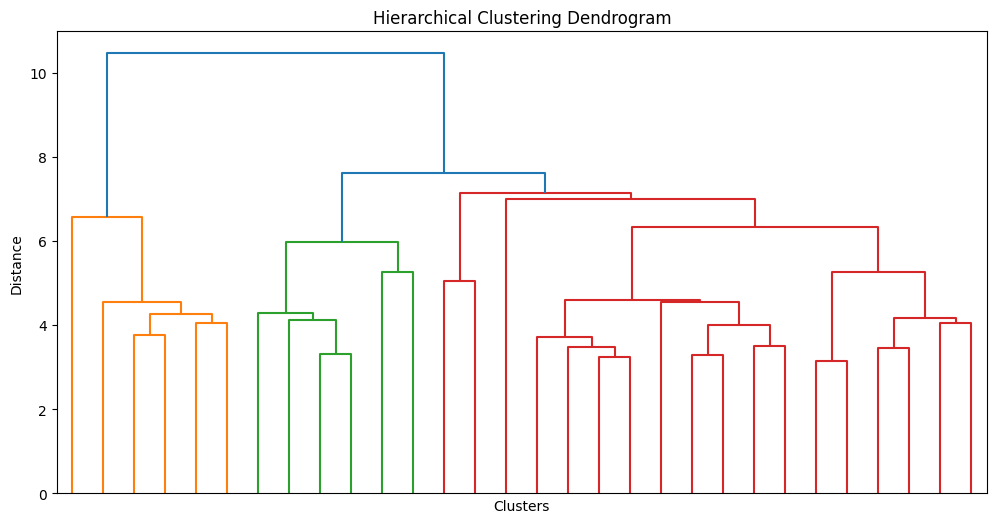

In [10]:
# Create vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['chunk'])
# Create a linkage matrix using 'ward' method
linkage_matrix = linkage(X.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data['cluster'].values, truncate_mode='lastp')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.xticks([])
plt.show()

# **Topic Extraction for Cluster Centroid Chunks Using LLama2**

In this phase of our analysis, we employ the LLama2 framework to perform topic extraction for each cluster's centroid chunk. Our approach involves computing these centroids using the mean value, which allows us to derive the most representative content within each cluster.

## **Gaining Deeper Insights: LLama2 Topic Extraction**

Topic extraction serves as a crucial component of our analytical endeavor, enabling us to delve into the semantic content of cluster centroid chunks. Here's our systematic approach:

### **Centroid Chunk Computation**

1. **Calculating Cluster Centroids**: We begin by calculating the centroid chunk for each cluster, using the mean value of the data points within the cluster. This ensures that the centroids represent the central content within each group.

### **Integration with LLama2**

1. **Seamless LLama2 Integration**: LLama2, a powerful natural language processing framework, is seamlessly integrated into our analysis pipeline to facilitate precise topic extraction.

2. **Cluster-Centric Analysis**: LLama2 is applied individually to each cluster's centroid chunk, allowing us to focus on the unique topics and concepts within these representative segments.

### **Topic Modeling and Interpretation**

1. **Advanced Topic Modeling**: LLama2 employs state-of-the-art topic modeling algorithms, such as Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF), to identify the most salient topics within each cluster's centroid chunk.

2. **Semantic Analysis**: We delve into the results of the topic modeling process, conducting semantic analysis to gain a comprehensive understanding of the primary themes and subject matter associated with each cluster's central content.


## **Leveraging Representative Knowledge**

By integrating LLama2 into our analysis pipeline and performing topic extraction on cluster centroid chunks derived through mean value calculations, we aim to harness in-depth knowledge about the most representative content within each cluster. This knowledge will empower us to make informed decisions, derive actionable insights, and unlock the full potential of our data for various applications.

This methodical and professional approach to topic extraction ensures that our analysis is rigorous, insightful, and centered around the most relevant content within each cluster's central chunk.

In [ ]:

def extract_topic(output):
    # Extract the first sentence from the output as the topic
    return output.split(".")[0].strip()
def extract_topic1(output):
    # Extract the first sentence from the output as the topic
    return output.split(":")[1].strip()
os.environ["REPLICATE_API_TOKEN"] = "r8_AhkBFwH27tJNDbK7HAlIhuOQfMzaJ4N1FES3r"
clusters = data['cluster'].unique()
cluster_to_topic = {}

n = 1
clusters_number=len(clusters)
for cluster in clusters:
    cluster_percent=round(n/clusters_number*100,0)
    clear_output(wait=True)
    print(f"{cluster_percent}  %")
    cluster_data = data[data["cluster"] == cluster]
    centroid = np.mean(embeddings[cluster_data.index], axis=0)
    similarities = cosine_similarity(embeddings[cluster_data.index], centroid.reshape(1, -1))
    most_similar_index = np.argmax(similarities)
    most_similar_sentence = cluster_data.iloc[most_similar_index]['processed']
    pre_prompt = """For example for this text:
    Can we begin? It would be nice if you could start with childhood. I am originally from Hemer in the Sauerland region, born in 1925. I was the first grandchild, the only one for a long time, and I was very spoiled because I spent a lot of time with my grandmother. My childhood was, in a way, normal, but I suffered from migraines since I was a preschooler, which worsened during my school years. I wanted to attend higher education, but I wasn't allowed because I was always told I was sick. So, I completed my elementary schooling in 1939, which was mandatory at the time before pursuing a career.

Since my grandparents had a bit of a snobbish attitude, I wasn't allowed to live with relatives or work as a maid in our town or nearby, so I ended up in a rural labor camp. Could you influence where you were placed? Well, not directly. As I mentioned, my grandparents didn't want me to work as a maid for others due to some prejudices, so I ended up in the labor camp. It was organized by the school, and they speak of a certain snobbishness of the grandparents.

Now, I didn't feel the need for it. They had everything, and they believed I didn't need to work as a maid for others. Looking back, I find it absurd because many who completed this mandatory year and didn't go to the camp had an easier time than those of us who went to the rural labor camp. In the camp, it was the season for hard work, especially during the summer when it was harvest time for the farmers. This was much tougher than just household chores. Household work was also part of life in the camp.

After that, I had some time off, and I spent about half a year at home. What did your parents do? My father worked in Iserlohn in a position known as the 'Kreisorganisationsleiter' in the labor front, somewhat similar to a modern-day labor union. My father was, however, a trained overseas merchant. So, was your father already involved in unions back then? No, he just had an interest in it. As an overseas merchant, he wanted to go abroad, to South American countries, but it didn't work out due to the war. The company he trained with went bankrupt or went out of business; I don't remember. It was a major overseas trading company.

Then, my father worked as a manager, and my mother was always at home. She helped my grandparents in their hotel. They were well-off, and I spent most of my time with my grandparents. I was more of a grandmother's child, I must say. I was there more often than at home. Although I had a strong attachment to my father, I didn't have a special relationship with my mother. In later years, when I returned from the labor camp and became an adult, my mother was jealous of the good relationship I had with my father. Then, I had a younger sister who was six years younger than me. She was quite resourceful, and she was more of a mother's child, as often happens with siblings. She was my only sister. She's still alive today, but we're not close anymore.

We don't get along today, but back then, I have to admit, I often got into trouble because of her. We always had to come inside by 7 in the summer and 6 in the winter. When my mother called, I was already at the front door, but my sister would climb over the cemetery wall and disappear into the nearest tree. She wouldn't be seen again, and I would get scolded every time for not making her come along. So, these are the kinds of stories you often hear among siblings.

the topic in just less than 10 words is: Life Experiences and Challenges in Germany during the Early 20th Century: A Personal Account.

now what is the topic in just less than 10 words for whole following text:

    """
    prompt_input = most_similar_sentence

    # Generate LLM response
    output = replicate.run(
        'replicate/llama-2-70b-chat:58d078176e02c219e11eb4da5a02a7830a283b14cf8f94537af893ccff5ee781',  # LLM model
        input={
            "prompt": pre_prompt+prompt_input,
            "system_prompt":"You are a helpful assistant.",
            "temperature": 0.75,
            "top_p": 1,
            "max_length": 64,
            "repetition_penalty": 1
        }
    )

    full_response = "".join(output)
    try:
      full_response =extract_topic1(full_response)
    except:
      pass
    try:
      full_response =extract_topic(full_response)
    except:
      pass
    print("              ",end="\r")
    print("Generated Response1:", full_response)
    # If the output is verbose, we can iterate again by feeding back the model's response as a new prompt
    #while True:
    if len(full_response.split()) > 20:  # Arbitrary number, adjust based on your needs
        iterative_prompt = "Condense the following into a less than 5 words topic: " + full_response
        output = replicate.run(
            'replicate/llama-2-70b-chat:58d078176e02c219e11eb4da5a02a7830a283b14cf8f94537af893ccff5ee781',  # LLM model
            input={
                "prompt": iterative_prompt,
                "system_prompt":"You are a helpful assistant.",
                "temperature": 0.01,
                "top_p": 1,
                "max_length": 32,
                "repetition_penalty": 1
            }
        )
        full_response = "".join(output)
        print("Generated Response2:", full_response)
      #else:
        #break
    cluster_to_topic[cluster] =full_response
    time.sleep(2)
    n+=1
    #print("Extracted Topic:", extract_topic(full_response))
print("Done!")


100.0  %
Generated Response1: Preserving Traditional Houses in Germany
Done!


# **Final Step: Saving Cluster Data with Associated Topics as a CSV File on Google Drive**

In this concluding phase of our analysis, we ensure the preservation and accessibility of our valuable insights. We achieve this by saving our data, enriched with topic information for each cluster, as a CSV (Comma-Separated Values) file stored securely on Google Drive.

## **Securing Our Insights: Data Export**

To ensure the lasting availability and utility of our findings, we follow these meticulous steps:

### **Data Enrichment with Topics**

1. **Topic Integration**: We enrich our data by seamlessly integrating the topics extracted from LLama2 into the respective clusters. Each record now bears valuable insights encapsulated by its associated topic.

### **Export to CSV Format**

1. **Data Export**: Our enriched dataset, now containing topic information, is meticulously exported as a CSV file. This widely accepted format ensures compatibility and ease of use across various data analysis platforms.

### **Secure Storage on Google Drive**

1. **Google Drive Integration**: We securely store the CSV file on Google Drive, leveraging its robust cloud storage capabilities to safeguard our data and facilitate convenient access for future reference.

### **Documentation and Metadata**

1. **File Naming Convention**: We adhere to a consistent and informative file-naming convention, ensuring clarity and organization.

2. **Metadata Inclusion**: For enhanced context, we include metadata within the CSV file or as accompanying documentation to provide a comprehensive understanding of the data and topics.

## **Long-Term Accessibility**

By saving our enriched data with topic information as a CSV file on Google Drive, we ensure its long-term accessibility and usability. This professional approach guarantees that our insights remain readily available for future analyses, reporting, and decision-making processes.

This final step marks the culmination of our analysis, where our enriched dataset becomes a valuable resource, facilitating informed actions and driving further exploration and understanding of the data's underlying concepts.


In [ ]:
data['topic'] = data['cluster'].map(cluster_to_topic)
print(data.head())
file_path = "/content/drive/My Drive/with_label/50word_with_topic_llama2Model_finale.csv"
directory_path = "/content/drive/My Drive/with_label"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
data.to_csv(file_path, index=False)

          id                                              chunk  \
0  ADG0001_1  können wir anfangen also wäre schön wenn sie m...   
1  ADG0001_2  der altersunterschied eben und normalerweise b...   
2  ADG0001_3  wir glichen uns im charakter und auch im ausse...   
3  ADG0001_4  sie waren also so in unmittelbarer nähe ja wir...   
4  ADG0001_5  überhaupt die nachmittage die so abliefen ja w...   

                                           processed  cluster  \
0  anfangen also schön Kindheit beginnen gebürtig...       19   
1  Altersunterschied eben normalerweise ruhig sag...      104   
2  gleichen Charakter auch ausseh sagen mal bissc...       72   
3  also unmittelbar Nähe Musst Fahrrad sagen mal ...       71   
4  überhaupt Nachmittage abliefen wie sagen sitze...       95   

                                               topic  
0  Personal experiences in Germany during World W...  
1            Germany, World War II, Personal Account  
2    Personal Account of Life in Germany 